In [74]:
import pandas as pd
data_combine = pd.read_excel('D:/大学/大三上/数据挖掘/作业/数据.xlsx')

In [261]:
data_combine = data_combine.drop(['text','word_split'],axis=1)

ValueError: labels ['text' 'word_split'] not contained in axis

In [43]:
data_combine = data_combine.drop(['eap_word_feature','hpl_word_feature','mws_word_feature'],axis=1)

In [263]:
data_combine_copy = data_combine.copy

In [341]:
data_combine = data_combine_copy()

In [336]:
data_combine = data_combine.drop(['lda_topic_'+str(i) for i in range(10)],axis=1)
# 去掉lda后0.317307

ValueError: labels ['lda_topic_0' 'lda_topic_1' 'lda_topic_2' 'lda_topic_3' 'lda_topic_4'
 'lda_topic_5' 'lda_topic_6' 'lda_topic_7' 'lda_topic_8' 'lda_topic_9'] not contained in axis

In [342]:
data_combine = data_combine.drop(['symbol_num_'+i for i in [',','.','?',':',"'"]],axis=1)
# 去掉lda+符号后去掉符号后0.319
# 单纯去掉符号0.317462
# 去掉lda加入id后0.318000

In [338]:
data_combine.columns

Index(['author', 'id', 'text_len', 'symbol_num', 'stopword_num',
       'word_mean_length', 'char_num', 'unique_word', 'svd_word_1to4gram_0',
       'svd_word_1to4gram_1', 'svd_word_1to4gram_2', 'svd_word_1to4gram_3',
       'svd_word_1to4gram_4', 'svd_word_1to4gram_5', 'svd_word_1to4gram_6',
       'svd_word_1to4gram_7', 'svd_word_1to4gram_8', 'svd_word_1to4gram_9',
       'svd_word_1to4gram_10', 'svd_word_1to4gram_11', 'svd_word_1to4gram_12',
       'svd_word_1to4gram_13', 'svd_word_1to4gram_14', 'svd_word_1to4gram_15',
       'svd_word_1to4gram_16', 'svd_word_1to4gram_17', 'svd_word_1to4gram_18',
       'svd_word_1to4gram_19', 'svd_word_1to4gram_20', 'svd_word_1to4gram_21',
       'svd_word_1to4gram_22', 'svd_word_1to4gram_23', 'svd_word_1to4gram_24',
       'svd_char_1to5gram_0', 'svd_char_1to5gram_1', 'svd_char_1to5gram_2',
       'svd_char_1to5gram_3', 'svd_char_1to5gram_4', 'svd_char_1to5gram_5',
       'svd_char_1to5gram_6', 'svd_char_1to5gram_7', 'svd_char_1to5gram_8',
       

In [323]:
data_combine = data_combine.drop(['text_len','symbol_num','stopword_num','word_mean_length','char_num','unique_word',
                                 'sentence_sentiment','pos_word_num','neg_word_num','pos_word_max','neg_word_min'],axis=1)

In [ ]:
# 然后试试正则化后的表现，一般情况下应该是没用的，因为xgboost说到底是个决策树模型，不应该有关系
# 果然是这样子的，但是在其他模型中还是要注意一下这一点

In [17]:
import re

In [250]:
pattern = re.compile(r'id(.*?)')
data_combine['id'] = data_combine.id.apply(lambda x:int(re.sub(pattern=pattern,repl='',string=x)))

In [343]:
train_data = data_combine[:-8392]

In [344]:
test_data = data_combine[-8392:]

In [345]:
author_mapping_dict = {'EAP':0, 'HPL':1, 'MWS':2}
train_y = train_data['author'].map(author_mapping_dict)

In [346]:
train_data = train_data.drop(['author'],axis=1)

In [347]:
train_data = train_data.drop(['id'],axis=1)

In [348]:
import xgboost as xgb

In [349]:
xgb_matrix = xgb.DMatrix(train_data,train_y)

In [350]:
xgb_matrix

In [377]:
# 关于xgboost的原理和python实现以及参数设置可以参考其官方文档，或者csdn上的博客，讲的都挺清楚的
# http://blog.csdn.net/zc02051126/article/details/46711047
param = {}
param['objective'] = 'multi:softprob'
param['eta'] = 0.01
param['max_depth'] = 3
param['silent'] = 1
param['num_class'] = 3
param['eval_metric'] = "mlogloss"
param['min_child_weight'] = 1
param['subsample'] = 0.8
param['colsample_bytree'] = 0.3
param['seed'] = 0
num_rounds =3000
model = xgb.train(params=list(param.items()),dtrain=xgb_matrix,num_boost_round=num_rounds)

In [378]:
import matplotlib.pyplot as plt
model.plot()
plt.show()

AttributeError: 'Booster' object has no attribute 'plot'

In [379]:
model

In [380]:
test_data = test_data.drop(['id','author'],axis=1)

ValueError: labels ['id' 'author'] not contained in axis

In [381]:
test_y = model.predict(xgb.DMatrix(test_data))

In [382]:
test_y

array([[  1.55442748e-02,   4.44195513e-03,   9.80013728e-01],
       [  9.93915021e-01,   4.14443528e-03,   1.94050081e-03],
       [  5.04115783e-03,   9.92607594e-01,   2.35123117e-03],
       ..., 
       [  9.59214270e-01,   2.57615764e-02,   1.50241442e-02],
       [  3.37608866e-02,   4.07218654e-03,   9.62166905e-01],
       [  6.04631305e-02,   9.38760400e-01,   7.76454457e-04]], dtype=float32)

In [383]:
result = pd.DataFrame(test_y)

In [384]:
result_id = data_combine[-8392:].id

In [385]:
result_id = result_id.reset_index().drop('index',axis=1)

In [386]:
final_result = pd.concat([result_id,result],axis=1)

In [387]:
final_result.to_csv('d:/test.csv',index=False)

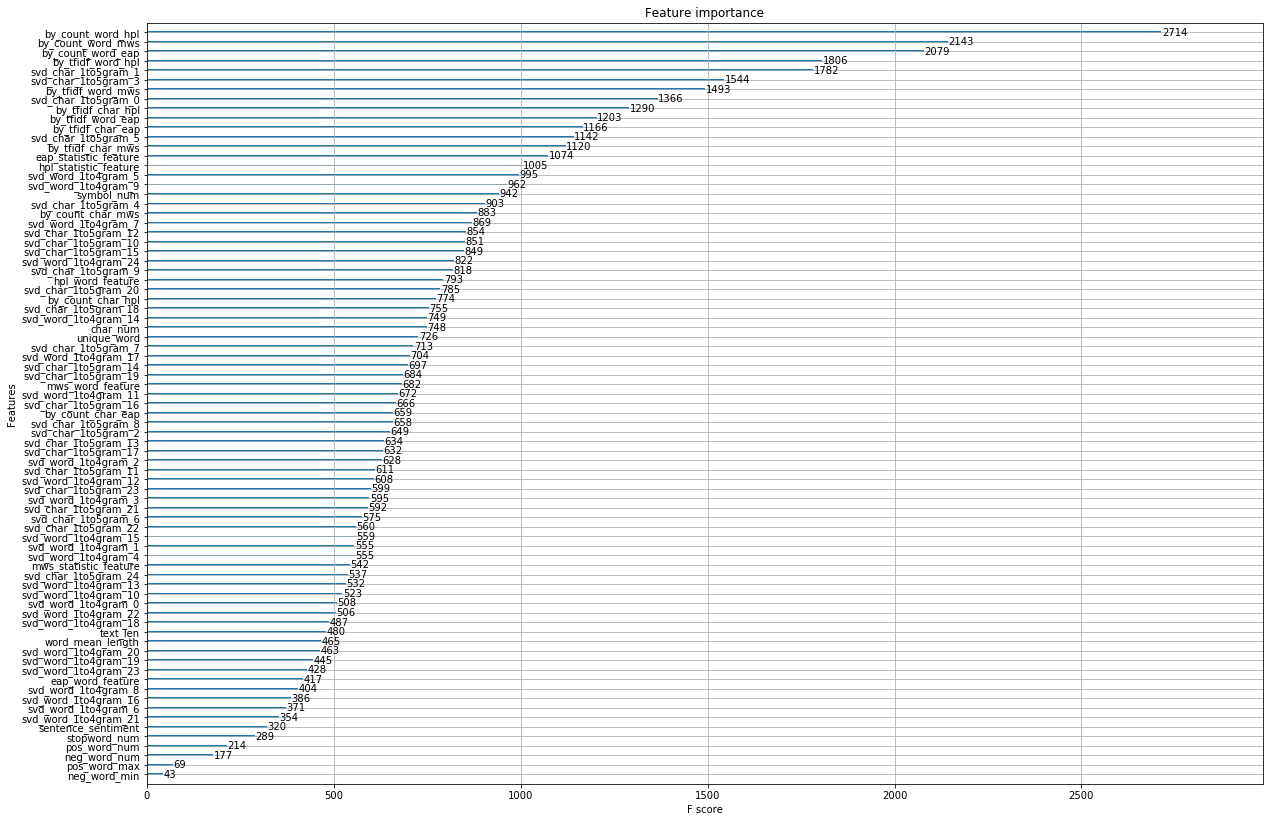

In [388]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(20,14))
ax = f.add_subplot(111)
xgb.plot_importance(model,ax=ax)
plt.show()

In [334]:
# 用单模型做到cv上的logloss在0.32左右，我自己觉得还可以吧，接下来也许可以试试ensemble了。
# 没想到早停和不早停差那么多效果
# 还是先看看特征的重要程度再说

In [ ]:
from sklearn.l